In [1]:
# Import the dependencies.
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
#In the next cell, we'll add the code that generates the latitudes and longitudes, but first, they need to be stored so 
#that we can access them later. Since we are creating arrays of latitudes and longitudes, we'll declare each array as a 
#variable.
# Create a set of random latitude and longitude combinations.
lats = np.random.uniform(low=-90.000, high=90.000, size=500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=500)
lat_lngs = zip(lats, lngs)
lat_lngs

#The zip object packs each pair of lats and lngs having the same index in their respective array into a tuple. If there 
#are 1,500 latitudes and longitudes, there will be 1,500 tuples of paired latitudes and longitudes, where each latitude 
#and longitude in a tuple can be accessed by the index of 0 and 1, respectively.

In [3]:
# Add the latitudes and longitudes to a list.
coordinates = list(lat_lngs)
#You can only unzip a zipped tuple once before it is removed from the computer's memory. Make sure you unzip the latitudes 
#and longitudes into the coordinates list before moving on.

In [4]:
# Use the citipy module to determine city based on latitude and longitude.
from citipy import citipy

In [5]:
# Use the tuple() function to display the latitude and longitude combinations.
for coordinate in coordinates:
    print(citipy.nearest_city(coordinate[0], coordinate[1]).city_name,
          citipy.nearest_city(coordinate[0], coordinate[1]).country_code)

buala sb
nizhneyansk ru
whitianga nz
attawapiskat ca
arraial do cabo br
sao joao da barra br
butaritari ki
punta arenas cl
castro cl
salinopolis br
nome us
hambantota lk
coihaique cl
alofi nu
iqaluit ca
imbituba br
nishihara jp
rikitea pf
haines junction ca
barrow us
bredasdorp za
provideniya ru
halalo wf
port hardy ca
georgetown sh
kapaa us
talakan ru
vaini to
albany au
saint-leu re
busselton au
vestmannaeyjar is
bonavista ca
atuona pf
tuatapere nz
grindavik is
takoradi gh
kapit my
komsomolskiy ru
lagoa pt
aanekoski fi
port elizabeth za
taoudenni ml
canberra au
albany au
ribeira grande pt
bredasdorp za
barrow us
bluff nz
los llanos de aridane es
yulin cn
dikson ru
hamilton bm
avarua ck
ushuaia ar
rikitea pf
bluff nz
san cristobal ec
la asuncion ve
rikitea pf
albany au
illoqqortoormiut gl
valdivia cl
rawson ar
waddan ly
gharghoda in
maldonado uy
buraydah sa
albany au
oranjemund na
rikitea pf
port alfred za
yarmouth ca
walvis bay na
sinazongwe zm
kodiak us
vaini to
rikitea pf
makinsk kz

In [6]:
# Create a list for holding the cities.
cities = []
# Identify the nearest city for each latitude and longitude combination.
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name

    # If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)
# Print the city count to confirm sufficient count.
len(cities)

275

# Module 6.2.1: Understanding APIs


In [7]:
#Using an API has its limitations because not all information from a server is accessible. Most APIs have tiered services, 
#from free to paid. Free services allow access to limited information, and paid subscriptions provide more access based on 
#the payment plan. Our company has a paid subscription for APIs, but we can only get certain information from websites on 
#hotels such as location, accessibility, rooms, prices, services, and amenities, as well as regional weather data.

# Module 6.2.2: Get Started with OpenWeatherMap API

In [8]:
#Launch the Anaconda Prompt for your PythonData environment.
#After the Python prompt, >, type python to launch Python.
#At the Python prompt, >>>, type import requests and press Enter.
#On the next line type requests.__version__ and press Enter.
#The output should be version 2.22.0 or later.

# Module 6.2.4: Make an API Call
## Retrieve a Response Using the get() Method

In [9]:
# Import the requests library.
import requests

# Import the API key.
from config import weather_api_key

In [10]:
# Starting URL for Weather Map API Call.
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key+ "&q=" + "Boston"
print(url)

http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=f1fbebd8ae0bab942dba92d8bad5d83b&q=Boston


In [11]:
# Create an endpoint URL for a city.
city_url = url + "&q=" + "Boston"
print(city_url)

http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=f1fbebd8ae0bab942dba92d8bad5d83b&q=Boston&q=Boston


In [12]:
# Make a 'Get' request for the city weather.
city_weather = requests.get(city_url)
city_weather

#The code output will be <Response [200]>, indicating a valid response. We won't see this code when a website appears in a 
#browser. However, when a website does not appear, we'll see a 404 code, indicating a client error. You can directly call 
#the response code with the get() method using the status_code. If we chain the status_code to the city_weather variable, 
#we get 200 as the output.

<Response [200]>

# Module 6.2.4: Get Data from a Response

In [13]:
# Create an endpoint URL for a city.
city_url = url + "&q=" + "Boston"
city_weather = requests.get(city_url)
city_weather

#When we run this cell the output is "<Response [200]>."
#When we receive a valid response from the server, we have to decide on the data format. The options are text, JSON, XML, 
#or HTML format. We can apply the format attributes to get the data into a useful format to parse.
#One format that provides a preview of the JSON data is the text attribute. Let's get the content for the Boston weather 
#data using the following code.

<Response [200]>

In [14]:
# Get the text of the 'Get' request.
city_weather.text
#The text in the output is a dictionary of dictionaries and arrays, or a JSON file. We can work with this data, but it 
#might be more challenging if we needed to retrieve temperature (temp) and humidity ( humidity) from this output because 
#the data is in a sentence format.

'{"coord":{"lon":-71.0598,"lat":42.3584},"weather":[{"id":800,"main":"Clear","description":"clear sky","icon":"01d"}],"base":"stations","main":{"temp":61.05,"feels_like":53.46,"temp_min":54,"temp_max":66,"pressure":1026,"humidity":62},"visibility":10000,"wind":{"speed":12.66,"deg":80},"clouds":{"all":1},"dt":1616526871,"sys":{"type":1,"id":3486,"country":"US","sunrise":1616496111,"sunset":1616540369},"timezone":-14400,"id":4930956,"name":"Boston","cod":200}'

In [15]:
# Get the JSON text of the 'Get' request.
city_weather.json()

{'coord': {'lon': -71.0598, 'lat': 42.3584},
 'weather': [{'id': 800,
   'main': 'Clear',
   'description': 'clear sky',
   'icon': '01d'}],
 'base': 'stations',
 'main': {'temp': 61.05,
  'feels_like': 53.46,
  'temp_min': 54,
  'temp_max': 66,
  'pressure': 1026,
  'humidity': 62},
 'visibility': 10000,
 'wind': {'speed': 12.66, 'deg': 80},
 'clouds': {'all': 1},
 'dt': 1616526871,
 'sys': {'type': 1,
  'id': 3486,
  'country': 'US',
  'sunrise': 1616496111,
  'sunset': 1616540369},
 'timezone': -14400,
 'id': 4930956,
 'name': 'Boston',
 'cod': 200}

# Module 6.2.4: Handle Request Errors

In [16]:
#When we submit a get request for the city_weather, we want to make sure that we get a valid response, i.e., 200, before 
#we retrieve any data. To check if we get a valid response, we can write a conditional expression that will evaluate 
#whether the status code is equal to 200. If it is, then we can print out a statement that says the weather data was found. 
#If there is a response other than 200, we can print out a statement that says the weather was not found, as in the 
#following example:
# Create an endpoint URL for a city.
city_url = url + "&q=" + "Boston"
city_weather = requests.get(city_url)
if city_weather.status_code == 200:
    print(f"City Weather found.")
else:
    print(f"City weather not found.")
    
#When the conditional expression is evaluated, it will print City weather found if true, or City weather not found if false.
#When we run the cell code above, the output is City weather found.

City Weather found.


In [17]:
#However, if we type print(city_url) in a new cell and run the cell, the output will be a URL. If we click the URL, the 
#web browser returns a 404 response and there is no data to retrieve.
print(city_url)


http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=f1fbebd8ae0bab942dba92d8bad5d83b&q=Boston&q=Boston


# Module 6.2.5: Parse a Response from an API

In [18]:
#Before we collect weather data from more than 500 cities, we'll walk through how to get the weather data from Boston. 
#First, correct the spelling for the city of Boston to get a valid URL
# Create an endpoint URL for a city.
city_url = url + "&q=" + "Boston"
city_weather = requests.get(city_url)
city_weather.json()

{'coord': {'lon': -71.0598, 'lat': 42.3584},
 'weather': [{'id': 800,
   'main': 'Clear',
   'description': 'clear sky',
   'icon': '01d'}],
 'base': 'stations',
 'main': {'temp': 61.05,
  'feels_like': 53.46,
  'temp_min': 54,
  'temp_max': 66,
  'pressure': 1026,
  'humidity': 62},
 'visibility': 10000,
 'wind': {'speed': 12.66, 'deg': 80},
 'clouds': {'all': 1},
 'dt': 1616526871,
 'sys': {'type': 1,
  'id': 3486,
  'country': 'US',
  'sunrise': 1616496111,
  'sunset': 1616540369},
 'timezone': -14400,
 'id': 4930956,
 'name': 'Boston',
 'cod': 200}

In [19]:
#let's assign a variable to the city_weather.json() data to the variable "boston_data" 
# Get the JSON data.
boston_data = city_weather.json()

In [20]:
boston_data['sys']['country']

'US'

In [21]:
#If we want to retrieve the date in the weather data, we would add the dt key to the boston_data variable
boston_data["dt"]

1616526871

In [22]:
#Using similar syntax to get the time of day, we can get the latitude, longitude, maximum temperature, humidity, 
#percent cloudiness, and wind speed. Add the following code to a new cell and run the cell.

lat = boston_data["coord"]["lat"]
lng = boston_data["coord"]["lon"]
max_temp = boston_data["main"]["temp_max"]
humidity = boston_data["main"]["humidity"]
clouds = boston_data["clouds"]["all"]
wind = boston_data["wind"]["speed"]
print(lat, lng, max_temp, humidity, clouds, wind)

42.3584 -71.0598 66 62 1 12.66


# Module 6.2.5: Convert the Date Timestamp

In [23]:
#Let's convert the date from the Boston weather data in the JSON format to the ISO format

# Import the datetime module from the datetime library.
from datetime import datetime
# Get the date from the JSON file.
date = boston_data["dt"]
# Convert the UTC date to a date format with year, month, day, hours, minutes, and seconds.
datetime.utcfromtimestamp(date)

datetime.datetime(2021, 3, 23, 19, 14, 31)

# Module 6.2.6: Get the City Weather Data


In [24]:
#1. Import our dependencies and initialize counters and an empty list that will hold the weather data.
#2. Loop through the cities list.
#3. Group the cities in sets of 50 to log the process as we find the weather data for each city.
    #Two counters will be needed here: one to log the city count from 1 to 50, and another for the sets.
#4. Build the city_url or endpoint for each city.
#5. Log the URL and the record and set numbers.
#6. Make an API request for each city.
#7. Parse the JSON weather data for the following:
    #City, country, and date
    #Latitude and longitude
    #Maximum temperature
    #Humidity
    #Cloudiness
    #Wind speed
#8. Add the data to a list in a dictionary format and then convert the list to a DataFrame.

# 1. Import Dependencies, and Initialize an Empty List and Counters

In [25]:
# Import the datetime module from the datetime library.
from datetime import datetime

# Import the requests library.
import requests

# Import the API key.
from config import weather_api_key

# Import the datetime module from the datetime library.
from datetime import datetime

In [26]:
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key

In [27]:
# Create an empty list to hold the weather data.
city_data = []
# Print the beginning of the logging.
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters.
record_count = 1
set_count = 1

#In the code block, we have initialized the counters at 1 because we want the first iteration of the logging for each 
#recorded response and the set to start at 1.

Beginning Data Retrieval     
-----------------------------


# 2. Loop Through the List of Cities and Build the City URL

In [28]:
# Loop through all the cities in the list.
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
    # Create endpoint URL with each city.
    city_url = url + "&q=" + city.replace(" ","+")

    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    # Add 1 to the record count.
    record_count += 1
    
    # Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

# If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

#Let's review the code:

#We parse the JSON file for the current city.
#If there is no weather data for the city, i.e. , a <Response [404]> then there is no weather to retrieve and City not found. Skipping... is printed.
#If there is weather data for the city, we will retrieve the latitude, longitude, maximum temperature, humidity, cloudiness,
#wind speed, and date and assign those values to variables.
#We could write a try-except block for each one of these parameters to handle the KeyError if the data wasn't found, but 
#since these parameters are always present in the response this won't be necessary.
#We append the cities list with a dictionary for that city, where the key-value pairs are the values from our weather 
#parameters.
#Finally, below the try block and after the except block, we add the closing print statement, which will let us know the 
#data retrieval has been completed. Make sure that your except block is indented and in line with the try block, and that 
#the print statements are flush with the margin.
#Under the print statement in the except block, we add the pass statement, which is a general purpose statement to handle 
#all errors encountered and to allow the program to continue.

Processing Record 1 of Set 1 | buala
Processing Record 2 of Set 1 | nizhneyansk
City not found. Skipping...
Processing Record 3 of Set 1 | whitianga
Processing Record 4 of Set 1 | attawapiskat
City not found. Skipping...
Processing Record 5 of Set 1 | arraial do cabo
Processing Record 6 of Set 1 | sao joao da barra
Processing Record 7 of Set 1 | butaritari
Processing Record 8 of Set 1 | punta arenas
Processing Record 9 of Set 1 | castro
Processing Record 10 of Set 1 | salinopolis
Processing Record 11 of Set 1 | nome
Processing Record 12 of Set 1 | hambantota
Processing Record 13 of Set 1 | coihaique
Processing Record 14 of Set 1 | alofi
Processing Record 15 of Set 1 | iqaluit
Processing Record 16 of Set 1 | imbituba
Processing Record 17 of Set 1 | nishihara
Processing Record 18 of Set 1 | rikitea
Processing Record 19 of Set 1 | haines junction
Processing Record 20 of Set 1 | barrow
Processing Record 21 of Set 1 | bredasdorp
Processing Record 22 of Set 1 | provideniya
Processing Record 

Processing Record 36 of Set 4 | matara
Processing Record 37 of Set 4 | luderitz
Processing Record 38 of Set 4 | kannad
Processing Record 39 of Set 4 | tautira
Processing Record 40 of Set 4 | praia
Processing Record 41 of Set 4 | nanortalik
Processing Record 42 of Set 4 | otane
Processing Record 43 of Set 4 | port lincoln
Processing Record 44 of Set 4 | la seyne-sur-mer
Processing Record 45 of Set 4 | cidreira
Processing Record 46 of Set 4 | umm lajj
Processing Record 47 of Set 4 | bethel
Processing Record 48 of Set 4 | sao gabriel da cachoeira
Processing Record 49 of Set 4 | nabire
Processing Record 50 of Set 4 | portland
Processing Record 1 of Set 5 | ati
Processing Record 2 of Set 5 | college
Processing Record 3 of Set 5 | axim
Processing Record 4 of Set 5 | brae
Processing Record 5 of Set 5 | esperance
Processing Record 6 of Set 5 | isoka
Processing Record 7 of Set 5 | saint george
Processing Record 8 of Set 5 | roman
Processing Record 9 of Set 5 | tiksi
Processing Record 10 of Set 

In [29]:
# tally the number of cities in the city_data array
len(city_data)

252

# Module 6.2.7: Create a DataFrame of City Weather Data

In [30]:
#Our next steps will entail converting the array of dictionaries to a DataFrame, ensuring the columns are in the correct 
#order, and exporting the DataFrame to a comma-separated (CSV) file.

#Recall that we can convert a list of dictionaries to a Pandas DataFrame using df = pd.DataFrame(list with dictionaries).
# Convert the array of dictionaries to a Pandas DataFrame.
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Buala,-8.1450,159.5921,79.65,84,95,5.35,SB,2021-03-23 19:24:33
1,Whitianga,-36.8333,175.7000,55.00,95,9,1.01,NZ,2021-03-23 19:24:33
2,Arraial Do Cabo,-22.9661,-42.0278,84.20,78,0,9.22,BR,2021-03-23 19:24:34
3,Sao Joao Da Barra,-21.6403,-41.0511,86.00,62,40,9.22,BR,2021-03-23 19:23:29
4,Butaritari,3.0707,172.7902,81.55,78,99,20.24,KI,2021-03-23 19:24:34
5,Punta Arenas,-53.1500,-70.9167,55.40,54,40,13.80,CL,2021-03-23 19:22:39
6,Castro,-24.7911,-50.0119,76.69,72,39,4.34,BR,2021-03-23 19:24:35
7,Salinopolis,-0.6136,-47.3561,80.80,84,34,9.35,BR,2021-03-23 19:24:35
8,Nome,64.5011,-165.4064,1.40,78,90,17.27,US,2021-03-23 19:24:35
9,Hambantota,6.1241,81.1185,79.92,78,100,14.74,LK,2021-03-23 19:24:36


In [31]:
new_column_order = ["City", "Country", "Date", "Lat", "Lng", "Max Temp", "Humidity", "Cloudiness", "Wind Speed"]
city_data_df = city_data_df[new_column_order]
city_data_df

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Buala,SB,2021-03-23 19:24:33,-8.1450,159.5921,79.65,84,95,5.35
1,Whitianga,NZ,2021-03-23 19:24:33,-36.8333,175.7000,55.00,95,9,1.01
2,Arraial Do Cabo,BR,2021-03-23 19:24:34,-22.9661,-42.0278,84.20,78,0,9.22
3,Sao Joao Da Barra,BR,2021-03-23 19:23:29,-21.6403,-41.0511,86.00,62,40,9.22
4,Butaritari,KI,2021-03-23 19:24:34,3.0707,172.7902,81.55,78,99,20.24
...,...,...,...,...,...,...,...,...,...
247,Montevideo,UY,2021-03-23 19:23:25,-34.8335,-56.1674,75.20,69,20,10.36
248,Port-Cartier,CA,2021-03-23 19:25:52,50.0334,-66.8654,50.00,46,20,11.50
249,Tecoanapa,MX,2021-03-23 19:25:52,16.5167,-98.7500,83.08,49,0,11.05
250,Pacific Grove,US,2021-03-23 19:23:03,36.6177,-121.9166,59.00,47,1,11.50


In [32]:
# Create the output file (CSV).
output_data_file = "weather_data/cities.csv"
# Export the City_Data into a CSV.
city_data_df.to_csv(output_data_file, index_label="City_ID")

#The last line in the code block will export the DataFrame to a CSV file, with the index label (or column A) header as 
#"City_ID." If we ever need to export the CSV file to a DataFrame, that header will be present in the DataFrame.

#We've completed our tasks for making API calls, parsing the response, and collecting the data for our project. Before we 
#move on to graphing and statistical analysis, let's update our GitHub repository.

# Module 6.3.1 Plot Latitude vs. Temperature

In [33]:
#We are going to create a series of scatter plots for each weather parameter against the latitude for all the cities. 
#The students will use these scatter plots to write a summary report on how different weather parameters change based on 
#the latitude.

#We'll create scatter plots for latitude vs. maximum temperature, humidity, cloudiness, and wind speed. The first, latitude 
#vs. maximum temperature, should look like the following scatter plot.

#Note: Recall that to create a scatter plot, we collect then add x- and y-axis data to plt.scatter()

In [34]:
#Step 1: First, we'll retrieve the data we need to create our scatter plots. We will need latitude, maximum temperature, 
#humidity, cloudiness, and wind speed from all the cities.

# Extract relevant fields from the DataFrame for plotting.
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

In [35]:
#Step 2: Your final scatter plot will need the current date in the title. To add the current date, we will need to import
#the time module, rather than the datetime module that we used to convert the date. The time module is a standard Python 
#library, so there is no need to install it.
# Import the time module.
import time
# Get today's date in seconds.
today = time.time()
today

1616531139.5694304

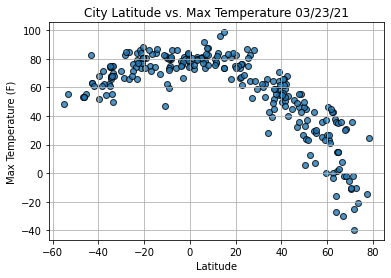

In [36]:
#The format for time appears like the datetime stamp for the JSON weather data. We can convert this using the string format
#method, strftime() and pass the formatting parameters for our date in parentheses. To get the format for today, we can add 
#%x inside the parentheses.

#In the API_practice file, add strftime("%x")to the time module for our today variable and run the cell. The output will be 
#today's date.
# Import time module
import time

# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            max_temps,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig1.png")

# Show plot.
plt.show()

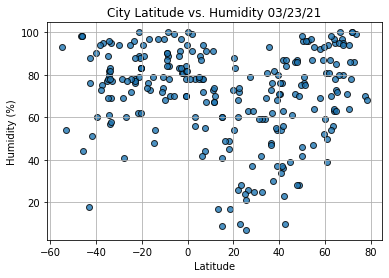

In [37]:
# Build the scatter plots for latitude vs. humidity.
plt.scatter(lats,
            humidity,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig2.png")
# Show plot.
plt.show()

# Module: 6.3.3 Plot Latitude vs. Cloudiness


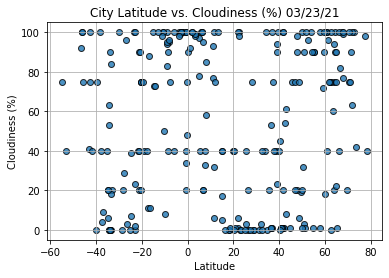

In [39]:
#Let's refactor the code for our scatter plots by changing the y-axis variable to "cloudiness," the title to "Cloudiness 
#(%)," and the y-axis label to "Cloudiness (%)."
# Build the scatter plots for latitude vs. cloudiness.
plt.scatter(lats,
            cloudiness,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Cloudiness (%) "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig3.png")
# Show plot.
plt.show()

# Module: 6.3.4 Plot Latitude vs. Wind Speed


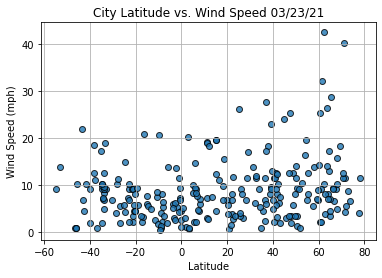

In [40]:
#Now, we can create our last scatter plot! Let's repurpose the code we have been using and change the y-axis variable to 
#"wind speed," the title to "Wind Speed," and the y-axis label to "Wind Speed (mph)."

# Build the scatter plots for latitude vs. wind speed.
plt.scatter(lats,
            wind_speed,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Wind Speed "+ time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig4.png")
# Show plot.
plt.show()